## Stocks & ETFs Machine Learning Predictive Model 

In [1]:
# Import libraries
import os
import numpy as np
import pandas as pd

#### 1. Data Preparation

In [2]:
 # define the path to the directory containing the files
dir_paths = ['/home/nerd/RiskThinking/stage/etfs'] #, '/home/nerd/RiskThinking/stage/etfs/']

In [3]:
# Get a list of all file paths in the directories
# Create an empty list to hold the file paths
file_paths = []  
# Loop over each directory path
for dir_path in dir_paths:  
    """
    Use os.listdir() to get a list of all files in the directory, then filter for only CSV files using .endswith()
    Use os.path.join() to join the directory path and file name into a full file path
    Append each full file path to the file_paths list
    """
    file_paths += [os.path.join(dir_path, f) for f in os.listdir(dir_path) if f.endswith('.csv')]

In [4]:
# Initialize an empty list to hold the dataframes
dfs = []

# Loop through each file path and read the CSV file into a dataframe
for file_path in file_paths:  # Loop over each file path
    df = pd.read_csv(file_path)  # Use pandas' read_csv() function to read the CSV file into a dataframe
    dfs.append(df)  # Append the dataframe to the dfs list


In [5]:
# Concatenate all the dataframes together into a single dataframe
df = pd.concat(dfs, ignore_index=True)

In [6]:
df.tail()

,symbol,security_name,date,open,high,low,close,adj_close,volume,vol_moving_avg,adj_close_rolling_med
3954311,PACA,Xtrackers MSCI Latin America Pacific Alliance ETF,2020-03-26,15.940,15.940,15.940,15.940,15.940,100.0,93.333333,21.488000
3954312,PACA,Xtrackers MSCI Latin America Pacific Alliance ETF,2020-03-27,15.042,15.042,15.042,15.042,15.042,0.0,93.333333,20.618000
3954313,PACA,Xtrackers MSCI Latin America Pacific Alliance ETF,2020-03-30,14.981,14.981,14.981,14.981,14.981,100.0,96.666667,19.537499
3954314,PACA,Xtrackers MSCI Latin America Pacific Alliance ETF,2020-03-31,15.444,15.444,15.444,15.444,15.444,0.0,96.666667,18.992999
3954315,PACA,Xtrackers MSCI Latin America Pacific Alliance ETF,2020-04-01,14.659,14.659,14.659,14.659,14.659,0.0,93.333333,18.370999


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='volume', ylabel='Count'>

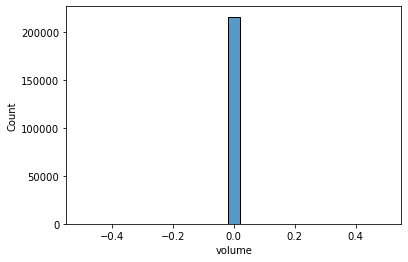

In [8]:
sns.histplot(df.volume[df.volume < .25], bins=25)

In [9]:
vol = np.log1p(df.volume)

In [10]:
vol

0          7.937732
1          7.378384
2          5.993961
3          0.000000
4          0.000000
             ...   
3954311    4.615121
3954312    0.000000
3954313    4.615121
3954314    0.000000
3954315    0.000000
Name: volume, Length: 3954316, dtype: float64

<AxesSubplot:xlabel='volume', ylabel='Count'>

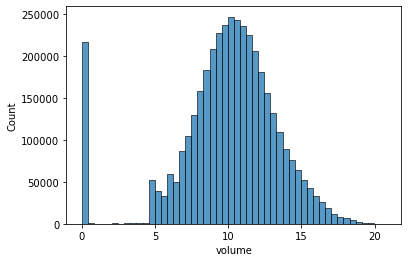

In [11]:
sns.histplot(vol, bins=50)

In [12]:
len(df)

3954316

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [14]:
# Assume `data` is loaded as a Pandas dfFrame
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [15]:
# Remove rows with NaN values
df.dropna(inplace=True)

In [16]:
np.random.seed(2)

n = len(df)

sample = int(0.1 * n)

idx = np.arange(n)
np.random.shuffle(idx)

In [17]:
df_shuffled = df.iloc[idx]

In [18]:
df2 = df_shuffled.iloc[ :sample].copy()

In [19]:
# Select features and target
features = ['vol_moving_avg', 'adj_close_rolling_med']
target = 'volume'

In [20]:
X = df2[features]
y = np.log1p(df2[target])

In [21]:
# Split df into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Create a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [35]:
# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [36]:
# Make predictions on test data
y_pred = model.predict(X_test)

In [37]:
# Calculate the Mean Absolute Error and Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [38]:
mse

2.6230907503692555

In [33]:
mae

0.964741726043107